In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
img=data.camera()

def paddingZero(_img,_size):#填充 避免损失边界信息
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

In [7]:
def Weighted_filter(_img):
    height=_img.shape[0]
    width=_img.shape[1]
    #模板
    template = np.array([
        [1,2,1],
        [2,4,2],
        [1,2,1]
    ])
    t_size=3
    img_padded = paddingZero(_img,t_size)

    test = np.zeros_like(_img,dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            window = window * template
            pixel = np.sum(window)/np.sum(template)
            pixel = int(pixel)
            test[i,j]=pixel
    return test

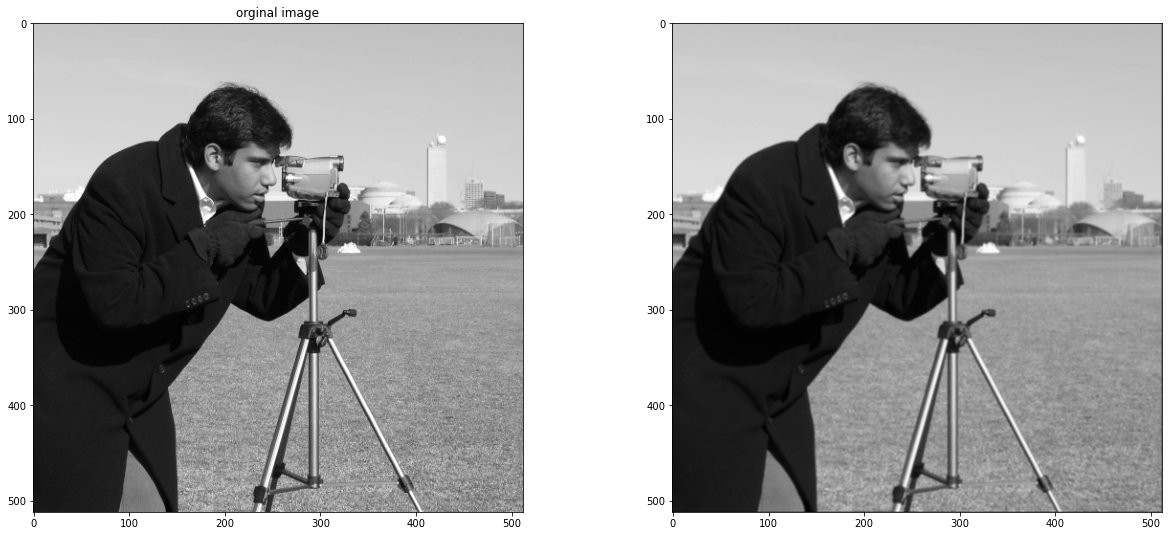

In [8]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,2,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

test_img = fig.add_subplot(1,2,2)
test_img.imshow(Weighted_filter(img),cmap='gray')
plt.show()